# 문제 1
- 네트워크
- https://school.programmers.co.kr/learn/courses/30/lessons/43162

```
문제 설명
네트워크란 컴퓨터 상호 간에 정보를 교환할 수 있도록 연결된 형태를 의미합니다. 예를 들어, 컴퓨터 A와 컴퓨터 B가 직접적으로 연결되어있고, 컴퓨터 B와 컴퓨터 C가 직접적으로 연결되어 있을 때 컴퓨터 A와 컴퓨터 C도 간접적으로 연결되어 정보를 교환할 수 있습니다. 따라서 컴퓨터 A, B, C는 모두 같은 네트워크 상에 있다고 할 수 있습니다.

컴퓨터의 개수 n, 연결에 대한 정보가 담긴 2차원 배열 computers가 매개변수로 주어질 때, 네트워크의 개수를 return 하도록 solution 함수를 작성하시오.

제한사항
컴퓨터의 개수 n은 1 이상 200 이하인 자연수입니다.
각 컴퓨터는 0부터 n-1인 정수로 표현합니다.
i번 컴퓨터와 j번 컴퓨터가 연결되어 있으면 computers[i][j]를 1로 표현합니다.
computer[i][i]는 항상 1입니다.
입출력 예
n	computers	return
3	[[1, 1, 0], [1, 1, 0], [0, 0, 1]]	2
3	[[1, 1, 0], [1, 1, 1], [0, 1, 1]]	1

입출력 예 설명
예제 #1
아래와 같이 2개의 네트워크가 있습니다.
```
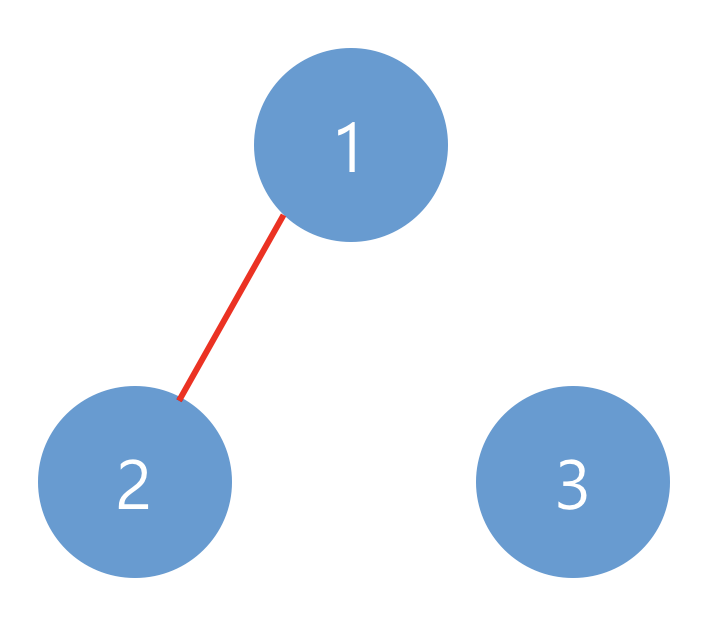

```
예제 #2
아래와 같이 1개의 네트워크가 있습니다.
```
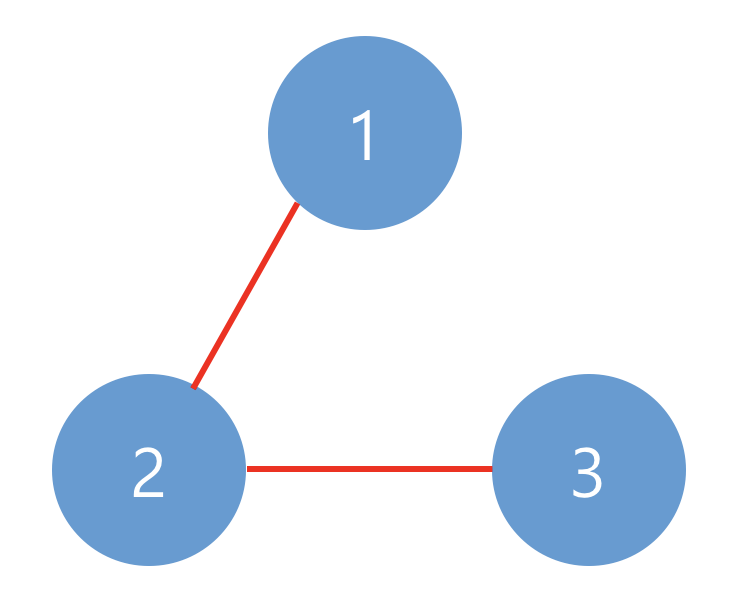

In [ ]:
from collections import deque

def solution(n, computers):
    visit = [False] * n
    graph = [[] for _ in range(n)]
    for i, node in enumerate(computers):
        for j, flag in enumerate(node):
            if flag == 1:
                graph[i].append(j)
    
    def bfs(i):
        q = deque()
        visit[i] = True
        q.append(i)
        while q:
            x = q.popleft()
            for each in graph[x]:
                if visit[each] == False:
                    visit[each] = True
                    q.append(each)
    
    answer = 0
    for node in graph:
        if node:
            for one in node:
                if visit[one] == False:
                    bfs(one)
                    answer += 1
                    if False not in visit:
                        return answer

    return answer

# 문제 2
- 조이스틱
- https://school.programmers.co.kr/learn/courses/30/lessons/42860

## 내가 생각한 풀이

- 반례 해결을 못함
- ex) BBAAAAB 의 경우, 한 쪽으로만 회전하면 안되고, 왔던길을 되돌아가는 과정이 필요함

In [ ]:
from collections import deque

def solution(name):
    tmp = []
    for c in name:
        n = ord(c) - 65
        tmp.append(n if n <= 13 else 26-n)
    
    print(tmp)
    tmp_l = deque(tmp)
    tmp_r = deque(tmp)
    # 오른쪽으로 한 바퀴 돌기 
    res_r = 0
    while sum(tmp_r) > 0:
        one = tmp_r.popleft()
        res_r += one
        if sum(tmp_r) == 0:
            break
        else:
            res_r += 1
        
    
    # 왼쪽으로 한 바퀴 돌기
    res_l = tmp_l.popleft()
    if sum(tmp_l) > 0:
        res_l += 1
    while sum(tmp_l) > 0:
        one = tmp_l.pop()
        res_l += one
        if sum(tmp_l) == 0:
            break
        else:
            res_l += 1
    
    print('왼쪽 돌기 결과 :', res_l)
    print('오른쪽 돌기 결과 :', res_r)
    answer = min(res_l, res_r)
    return answer

## 정답 풀이
- https://leonkong.cc/posts/python-deque.html

- 알파벳 바꾸는 횟수와 이동 횟수를 따로 분리
- 알파벳 바꾸는 횟수는 내 코드와 동일
- ```이동 횟수```에 주목하자!
    - 연속된 A가 등장 하는 경우, 그 연속된 A의 왼쪽으로 회전하느냐, 오른쪽으로 회전하느냐를 결정해야 한다.
    - 이를 구현하는 코드 (왼쪽으로 회전하면 몇 번 움직여야하고, 오른쪽으로 움직이면 몇번움직여야하고..)
        - 왼쪽 시작 : 현재 위치(A 등장 이전) * 2 + 전체길이 - (현재 위치 + A가 연속된 길이)
            - A가 끝나는 지점 까지 count 하기 때문에, A가 아닌 현재 위치주소를 빼줘야 한다. 그렇기 때문에 앞 부분에 i*2 해주는 것 
            - ex) BCAAAAD 인 경우, 이미 C까지 간 상태에서 왼쪽으로 돌아가야 하기 때문에 1*2 + 전체길이(7) - 연속된 A가 끝나는 지점(6)
                -  (CB / D)
              
        - 오른쪽 시작 : 현재 위치(A 등장 이전) + 2 * (전체길이 - (현재위치 + A가 연속된 길이))
            - 반대로 오른쪽에서 부터 돌아들어온다고 생각하면, 전체길이에서 A가 마무리 되는 위치까지 빼면, 그 뒤에 붙은 길이 * 2 + 앞 부분
            - ex) BCAAAD 인 경우, D부터 시작해서 , BC 순으로 돌아가기 때문에, 최소 경로는 3
                - (D / BC)

In [ ]:
def solution(name):
    # 조이스틱 조작 횟수 
    answer = 0
    
    # 기본 최소 좌우이동 횟수는 길이 - 1
    min_move = len(name) - 1
    
    for i, char in enumerate(name):
        # 해당 알파벳 변경 최솟값 추가
        answer += min(ord(char) - ord('A'), ord('Z') - ord(char) + 1)
        
        # 해당 알파벳 다음부터 연속된 A 문자열 찾기
        next = i + 1
        while next < len(name) and name[next] == 'A':
            next += 1
            
        # 기존, 연속된 A의 왼쪽시작 방식, 연속된 A의 오른쪽시작 방식 비교 및 갱신
        min_move = min([min_move, 2 *i + len(name) - next, i + 2 * (len(name) -next)])
        
    # 알파벳 변경(상하이동) 횟수에 좌우이동 횟수 추가
    answer += min_move
    return answer

In [4]:
answer = 0
name = "BBAAAAC"

# 기본 최소 좌우이동 횟수는 길이 - 1
min_move = len(name) - 1

for i, char in enumerate(name):
    # 해당 알파벳 변경 최솟값 추가
    answer += min(ord(char) - ord('A'), ord('Z') - ord(char) + 1)

    # 해당 알파벳 다음부터 연속된 A 문자열 찾기
    next = i + 1
    while next < len(name) and name[next] == 'A':
        next += 1

    # 기존, 연속된 A의 왼쪽시작 방식, 연속된 A의 오른쪽시작 방식 비교 및 갱신
    print('i, 왼쪽으로 돌기, next:',i, 2 *i + len(name) - next, next)
    print('i, 오른쪽으로 돌기, next:',i, i+2*(len(name)-next), next)
    print('------------')
    min_move = min([min_move, 2 *i + len(name) - next, i + 2 * (len(name) -next)])

# 알파벳 변경(상하이동) 횟수에 좌우이동 횟수 추가
answer += min_move

i, 왼쪽으로 돌기, next: 0 6 1
i, 오른쪽으로 돌기, next: 0 12 1
------------
i, 왼쪽으로 돌기, next: 1 3 6
i, 오른쪽으로 돌기, next: 1 3 6
------------
i, 왼쪽으로 돌기, next: 2 5 6
i, 오른쪽으로 돌기, next: 2 4 6
------------
i, 왼쪽으로 돌기, next: 3 7 6
i, 오른쪽으로 돌기, next: 3 5 6
------------
i, 왼쪽으로 돌기, next: 4 9 6
i, 오른쪽으로 돌기, next: 4 6 6
------------
i, 왼쪽으로 돌기, next: 5 11 6
i, 오른쪽으로 돌기, next: 5 7 6
------------
i, 왼쪽으로 돌기, next: 6 12 7
i, 오른쪽으로 돌기, next: 6 6 7
------------
